# Greedy Algorithm (=탐욕법)

* Greedy는 현 상황에서 당장 최고로 좋은 것만을 취하는 방법
* Greedy는 해법의 정당성 분석이 중요
    - 단순히 가장 좋아보이는 것을 반복적으로 선택해도 최적의 해를 구할 수 있는지 검토해야함
    - 즉, 일반적인 상황에서 Greedy Algorithm은 최적의 해를 보장할 수 없을 때가 많음
* 그러나 코딩 테스트에서 대부분 Greedy 문제는 탐욕법으로 얻은 해가 최적의 해가 되는 상황에서, 이를 추론할 수 있어야 풀리도록 출제됨
    

### 참고)
- <문제 설명>을 읽고 문제를 먼저 풀어본 후, <문제 해결 아이디어>와 정답을 비교해볼 것

---
---

## <문제 1> 거스름 돈
* 문제 설명
    - 당신은 음식점의 계산을 도와주는 점원입니다. 카운터에는 거스름돈으로 사용할 500원, 100원, 50원, 10원짜리 동전이 무한히 존재한다고 가정합니다. 손님에게 거슬러주어야 할 돈이 N원일 때 거슬러 주어야 할 동전의 최소 개수를 구하세요. 단, 거슬러 줘야 할 돈 N은 항상 10의 배수입니다.


* 문제 해결 아이디어
    - 최적의 해를 빠르게 구하기 위해서는 <u>**가장 큰 화폐 단위부터 돈을 거슬러 줘야 함!**</u>
    - N원을 거슬러 줘야 할 때, 가장 먼저 500원으로 거슬러줄 수 있는 만큼 거슬러준 후
        이후에 100원, 50원, 10원 동전을 차례로 거슬러줄 수 있는 만큼씩 거슬러주면 됨


* 이러한 접근이 가능한 이유
    - 동전 중 큰 단위가 항상 작으 단위의 배수이므로 작은 단위 동전들을 종합해서 다른 해가 나올 수 없기 때문
    ex) N=800이고, 500원,400원,100원일 때 -> 500+(100 * 3)보다 (400 * 2)가 더 그리디한 답이 되버림
    
* N = 1260일 때 계산해보자


In [17]:
''' Python '''
n = 1260
count = 0

money = [500, 100, 50, 10]

for coin in money:    
    count += n // coin
    n = n % coin             # <중요> 틀린이유 : n -= count*coin
                             # <중요> 틀린이유 : n = n + (n % coin)

print(count)

''' C++ '''
"""
#include <bits/stdc++.h>
using namespace std;

int n = 1260;
int count;

int money[4] = [500, 100, 50, 10];

int main(void){
    for(int i = 0, i < 4, i++){
        count = count + (n / money[i]);
        n = n % money[i];
    }
    cout << count << '\n';
}
"""

6


"\n#include <bits/stdc++.h>\nusing namespace std;\n\nint n = 1260;\nint count;\n\nint money[4] = [500, 100, 50, 10];\n\nint main(void){\n    for(int i = 0, i < 4, i++){\n        count = count + (n / money[i]);\n        n = n % money[i];\n    }\n    cout << count << '\n';\n}\n"

* 위 알고리즘의 시간복잡도
    - 화폐 종류가 K라고할 때, 시간복잡도 : O(K)
    - 거슬러줘야하는 금액과 무관하게 동전 종류에 영향을 받는다

---
---

## < 문제 2 > 1이 될 때까지
* 문제 설명
    - 어떠한 수 N=1이 될 때까지 다음의 두 과정 중 하나를 반복적으로 선택하여 수행하려고 한다. 단, 두 번째 연산은 N이 K로 나누어 떨어질 때만 선택할 수 있다.
        1. N에서 1을 뺀다
        2. N을 K로 나눈다
        
    - 예를 들어, N=17, K=4라고 가정한다. 이때, 1번을 한 번 수행하면 N=16이 된다. 이후 2번을 두 번 수행하면 N=1이 된다. 결과적으로 이 경우 전체 과정을 실행한 횟수는 3이 된다. 이는 N을 1로 만드는 최소한의 횟수다.
    
    - N과 K가 주어질 때, N=1이 될 때까지 1번 혹은2번을 "수행해야하는 최소 횟수"를 구하는 프로그램을 작성하시오
    
    
* 문제 해결 아이디어
    - 주어진 N에 대해 <u>**최대한 많이 나누기**</u>를 수행하면 된다
    - N의 값을 줄일 때 2 이상의 수로 나누는 작업이 1을 빼가는 작업보다 N을 훨씬 많이 줄일 수 있다
    
    
* 정당성 분석
    - <u>**가능하면 최대한 많이 나누는 작업**</u>이 최적의 해를 항상 보장할까?
    - N이 아무리 큰 수여도, K로 계속 나누면 기하급수적으로 빠르게 줄일 수 있다.
    - 다시말해 K가 2이상이면, K로 나누는 것이 1을 빼는 것보다 항상 빠르게 N을 줄일 수 있다.
    
* n과 k를 사용자로부터 입력받고, 결과를 출력하는 코드를 짜보자

In [19]:
''' Python '''
n, k = map(int, input().split())
result = 0        # 총 수행하는 연산의 수

while True:
    # 일단 n을 k로 나누어 떨어지는 수가 될 때까지 빼기 => 나눗셈을 이용해 한번에 계산해서 빼버림 (이해!)
    target = (n // k) * k            # k의 배수 중 n에 가장 가까운 값을 나누기로 계산하는 방법
    result = result + (n - target)   # 1을 빼는 연산을 몇 변할지 한번에 계산하여 넣어줌
    n = target                       # ex) n=26, k=3 -> (n//k)*k = 8*3=24고, 26-24=2번만큼 1을 한번에 빼버림!!
    
    # n이 k보다 작을 때(나눌 수 없을 때) 반복문 탈출
    if n < k:
        break
    
    # k로 나누기
    result = result + 1              # 총 연산 횟수에 <2번 연산>했음을 한 번 더해줌
    n = n // k                       # 나눴을 때 n을 update (->> 다음iter수행)
    
# 마지막으로 남은 수에 대해 1씩 빼기
result = result + (n-1)              # because if(n<k)
print(result)

''' C++ '''
"""
#include <bits/stdc++.h>
using namespace std;

int n, k;
int result = 0;

int main(void){
    cin >> n >> k;
    
    while(true){
        int target = (n/k)*k;
        result = result + (n - target);
        n = result;
        
        if(n<k){
            break;
        }
        
        result += 1;
        n = n / k;        
    }
    
    result = result + (n-k);
    cout << result << '\n';
}
"""

26 3
7


---
---

## <문제 3> 곱하기 혹은 더하기
* 문제 설명
    - 각 자리가 숫자(0~9)로만 이루어진 문자열 S가 주어졌을 때, 왼쪽부터 오른쪽으로 하나씩 모든 숫자를 확인하며 숫자 사이에 'x' 혹은 '+'연산자를 넣어 결과적으로 ***만들어질 수 있는 가장 큰 수를 구하는 프로그램***을 작성하시오. 단, +보다 x를 먼저 계산하는 일반적인 방식과 달리, ***모든 연산은 왼쪽부터 순서대로*** 이루어진다고 가정한다
    - 예를들어, 02984라는 문자열로 만들 수 잇는 가장 큰 수는 ((((0+2)x9)x8)x4) = 576이다.
    - 또한 만들어질 수 있는 가장 큰 수는 항상 20억 이하의 정수가 되도록 입력이 주어진다
    
    
* 문제 해결 아이디어
    - 대부분의 경우 '+'보다는 'x'가 더 값을 크게 만든다
    
    - 다만, 두 수 중에서 하나라도 '0'이나 '1'인 경우, 곱하기보다 더하기를 하는게 더 효율적
    - 따라서 ***두 수에 대해 연산을 수행할 때, 두 수 중에서 하나라도 1 이하인 경우엔 더하기를***
    - ***두 수가 모두 2 이상인 경우에는 곱하기를 하면 정답이다.***

In [25]:
''' Python '''
data = input()

# 첫 번째 문자를 숫자로 변경하여 대입
result = int(data[0])

for i in range(1, len(data)):
    num = int(data[i])
    # 두 수 중에서 하나라도 0 또는 1이면 '+'를 수행
    if result <= 1 or num <= 1:
        result += num
    else:
        result *= num
        
print(result)

''' C++ '''
"""
#include <bits/stdc++.h>
using namespace std;

String str;

int main(void){
    cin >> str;
    
    long long result = str[0] - '0';      // result = atoi(str[0]);
    
    for(int i=1; i<str.size(); i++){
        int num = str[i] = '0';
        if(num<=1 || result<=1) result += num;
        else result *= num;
    }
    cout << result << '\n';
}
"""

02984
576


---
---

## <문제 4> 모험가 길드
* 문제 설명
    - 한 마을에 모험가가 N명 있다. 모험가 길드에서는 N명의 모험가를 대상으로 '공포도'를 측정햇는데, '공포도'가 높은 모험가는 쉽게 공포를 느껴 위험한 상황에서 제대로 대처할 능력이 떨어진다.
    - 모험가 길드장인 길동이는 모험가 그룹을 안전하게 구성하고자 ***공포도가 X인 모험가는 반드시 X명 이상으로 구성한 길드에 참여***해야 여행을 떠날 수 있도록 규정했다.
    - 길동이는 최대 몇 개의 길드를 만들 수 있는지 궁금하다. 
    - 따라서 N명의 모험가에 대한 정보가 주어졌을 때, ***여행을 떠날 수 있는 길드 수의 최댓값***을 구하는 프로그램을 작성
    ---
    - 예를들어 N=5이고, 각 모험가의 공포도는 다음과 같다고 가정한다.
        [ 2 3 1 2 2 ]
    - 이 경우 그룹1에 공포도가 1,2,3인 모험가를 한 명씩 넣고, 그룹2에 공포도가 2인 남은 두 명을 넣으면 총 2개의 그룹을 만들 수 있다.
    - 또한, 몇 명의 모험가는 마을에 그대로 남아있어도 되기 때문에, 모든 모험가를 특정 그룹에 넣을 필요는 없다.
    ---
    
* 문제 해결 아이디어
    - sorting 먼저 수행한 후 < =핵심아이디어! >
    - 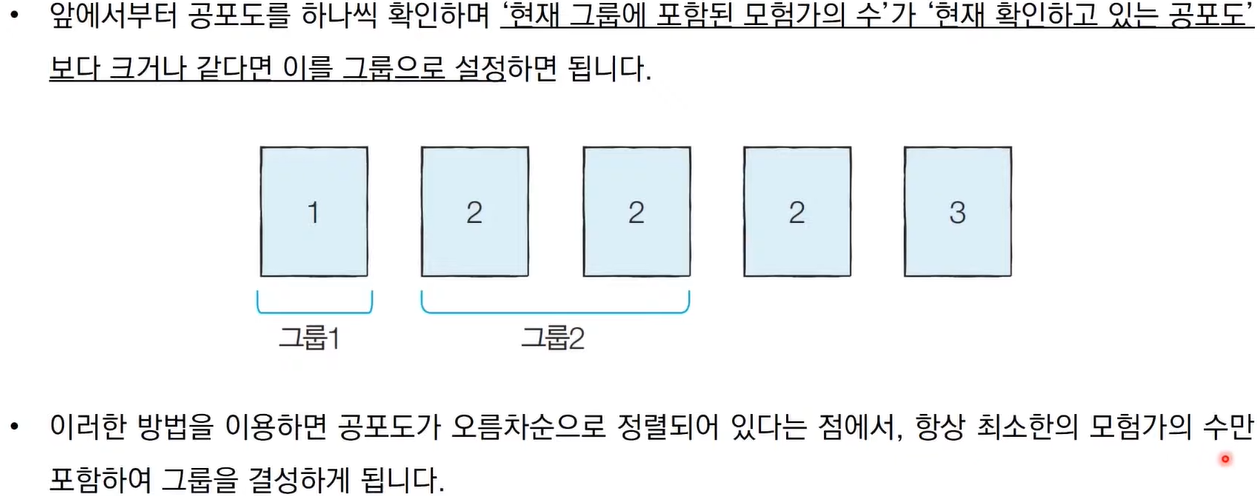
    
    -
    

In [33]:
''' Python '''

data = list(map(int, input().split()))    # 각 모험가의 공포도
data.sort()

result = 0  # 총 그룹의 수
count = 0   # 현재 그룹에 포함된 모험가의 수

for i in data:
    # 첫 사람 추가
    count += 1
    # sorting되어있기 때문에
    # 현재 그룹에 포함된 모험가의 수가 현재 공포도 이상이면, 길드 결성해 내보냄
    if i <= count:        
        result += 1    # 총 그룹 수 증가
        count = 0      # 그룹 결성 시 현 그룹 모험가 수 초기화
        
print(result)
    
''' C++ '''
"""
#include <bits/stdc++.h>
using namespace std;

vector<int> data;

int main(void){
    < cin >> data 생략 >
   sort(data.begin(), data.end());

    int result = 0;
    int count = 0;
    
    for(int i=0; i<=data.size(); i++){
        count += 1;
        if(data[i] <= count){
            result += 1;
            count = 0;
        }    
    }
    cout << result;
}
"""

1 3 2 1
2


'\n#include <bits/stdc++.h>\nusing namespace std;\n\nvector<int> data;\n\nint main(void){\n    < cin >> data 생략 >\n   sort(data.begin(), data.end());\n\n    int result = 0;\n    int count = 0;\n    \n    for(int i=0; i<=data.size(); i++){\n        count += 1;\n        if(data[i] <= count){\n            result += 1;\n            count = 0;\n        }    \n    }\n    cout << result;\n}\n'

# 시간 될 때 책-02.Greedy 풀지 않은 나머지 문제 풀기